In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv("D:/Data Science/DataTrained/Files-main/bigdatamart_Train.csv")

data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data_test = pd.read_csv("D:/Data Science/DataTrained/Files-main/bigdatamart_Test.csv")

data_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2965,FDE47,14.15,Low Fat,0.038063,Starchy Foods,122.5046,OUT018,2009,Medium,Tier 3,Supermarket Type2
5028,FDM02,12.50,Regular,0.073850,Canned,86.3198,OUT049,1999,Medium,Tier 1,Supermarket Type1
2561,FDI05,NaN,Regular,0.222132,Frozen Foods,74.4354,OUT019,1985,Small,Tier 1,Grocery Store
1860,DRG01,14.80,Low Fat,0.045132,Soft Drinks,77.1670,OUT017,2007,NaN,Tier 2,Supermarket Type1
843,DRL59,16.75,Low Fat,0.021224,Hard Drinks,52.7298,OUT046,1997,Small,Tier 1,Supermarket Type1


In [4]:
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
print('Training Data Shape: ', data_train.shape)
print('Test Data Shape: ', data_test.shape)

Training Data Shape:  (8523, 12)
Test Data Shape:  (5681, 11)


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
data_train.drop_duplicates(inplace = True)

data_train.shape

(8523, 12)

In [11]:
data_test.drop_duplicates(inplace = True)

data_test.shape

(5681, 11)

In [12]:
data_train.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


<AxesSubplot:xlabel='Item_Weight'>

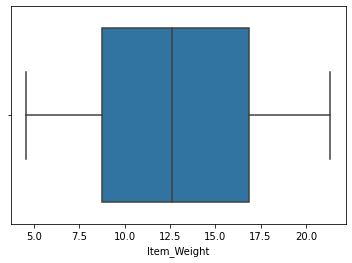

In [13]:
sns.boxplot('Item_Weight', data = data_train  )

<AxesSubplot:xlabel='Item_Weight'>

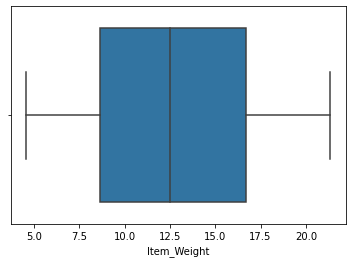

In [14]:
sns.boxplot('Item_Weight', data = data_test  )

Since Item_weight is float data type, therefore using mean method to fill the NaN values.

In [15]:
data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean(), inplace = True)

In [16]:
data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean(), inplace = True)

In [17]:
data_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
data_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Since Outlet_size is having Categorical Data Type, therefore using mode method to fill the NaN values.

In [19]:
data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0], inplace = True)
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0], inplace = True)

In [20]:
data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Now there is no Null values present in the dataset.

In [22]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
data_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Since, 'LF', 'low fat' are same as 'Low Fat' and 'reg' is same as 'Regular', therefore we combine these entities into one.

In [24]:
data_train['Item_Fat_Content'] = data_train['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})
data_test['Item_Fat_Content'] = data_test['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

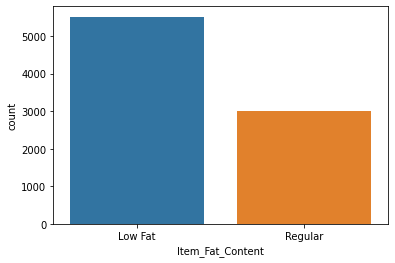

In [25]:
sns.countplot(data_train['Item_Fat_Content'])

Observation: The Low Fat items are more than Regular Items.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

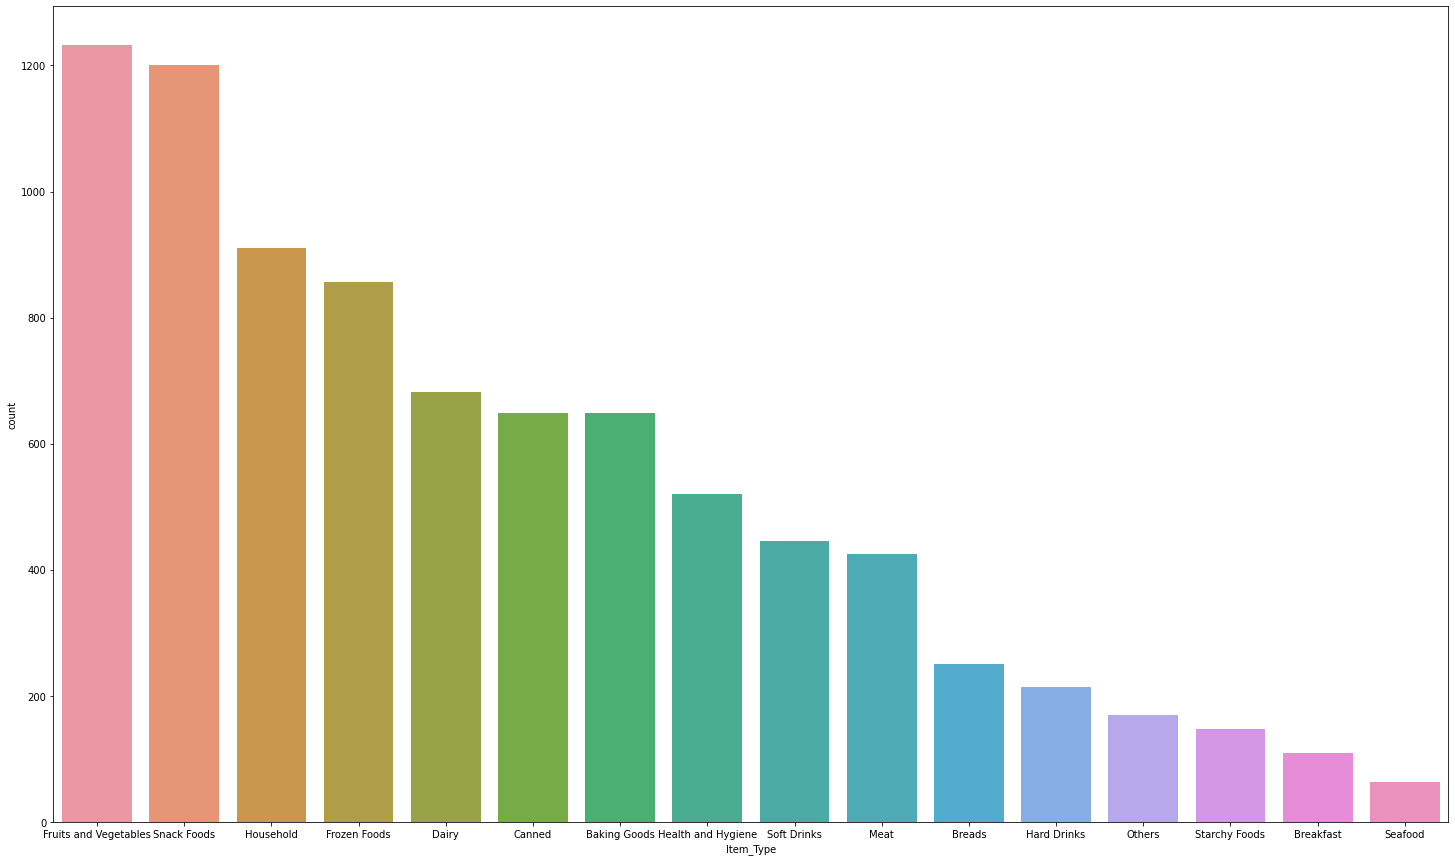

In [26]:
plt.figure(figsize = (25,15))
sns.countplot(data_train['Item_Type'], order = data_train['Item_Type'].value_counts().index)

Observation: Fruits and Vegetables & Snack Foods items are more whereas seafood items are less.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

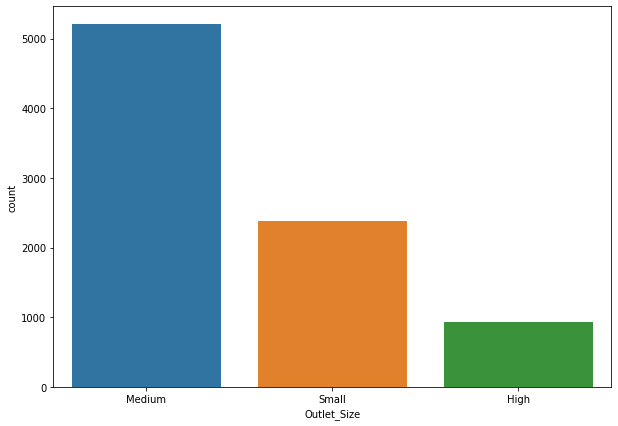

In [27]:
plt.figure(figsize = (10,7))
sns.countplot(data_train['Outlet_Size'], order = data_train['Outlet_Size'].value_counts().index)

Observation: There are more medium size outlets while the high size outlets are less.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

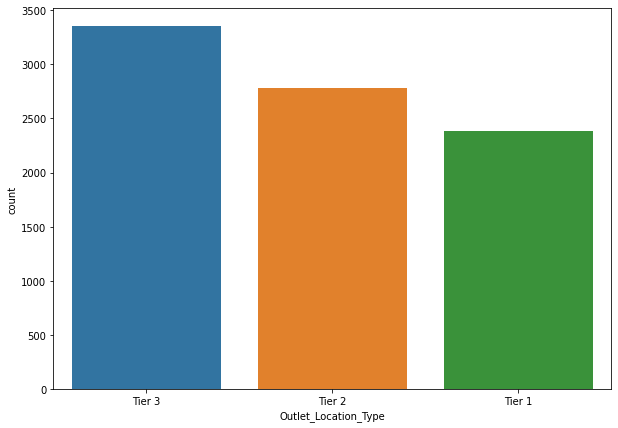

In [28]:
plt.figure(figsize = (10,7))
sns.countplot(data_train['Outlet_Location_Type'], order = data_train['Outlet_Location_Type'].value_counts().index)

Observation: There are more stores in Tier3 Cities.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

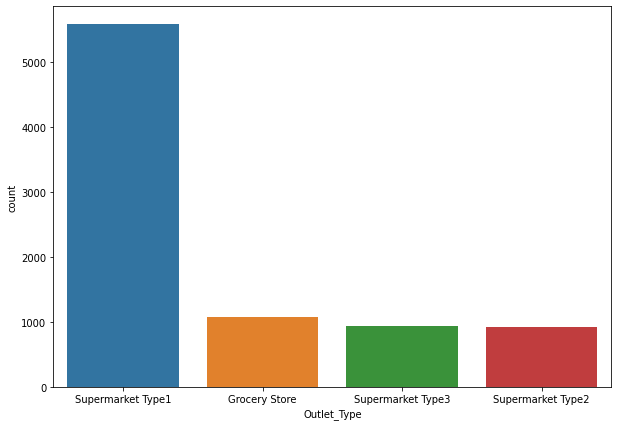

In [29]:
plt.figure(figsize = (10,7))
sns.countplot(data_train['Outlet_Type'], order = data_train['Outlet_Type'].value_counts().index)

Observation: There are more stores of 'Supermarket Type 1' than any other stores type.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

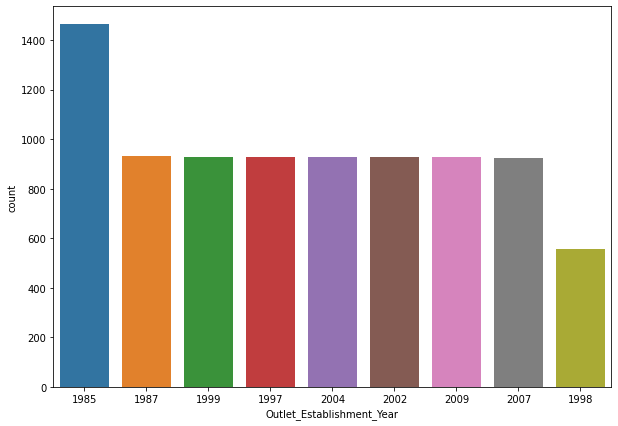

In [30]:
plt.figure(figsize = (10,7))
sns.countplot(data_train['Outlet_Establishment_Year'], order = data_train['Outlet_Establishment_Year'].value_counts().index)

Observations: The Outlets are more for Outler_Establishment_year 1985.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

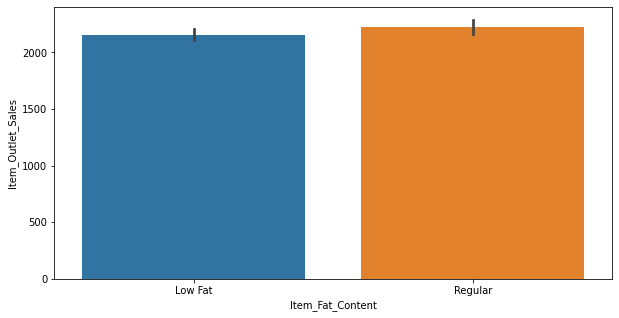

In [31]:
plt.figure(figsize = (10,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales', data = data_train)

Observation: The Outlet Sales is almost same for both low fat and regulat item types.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

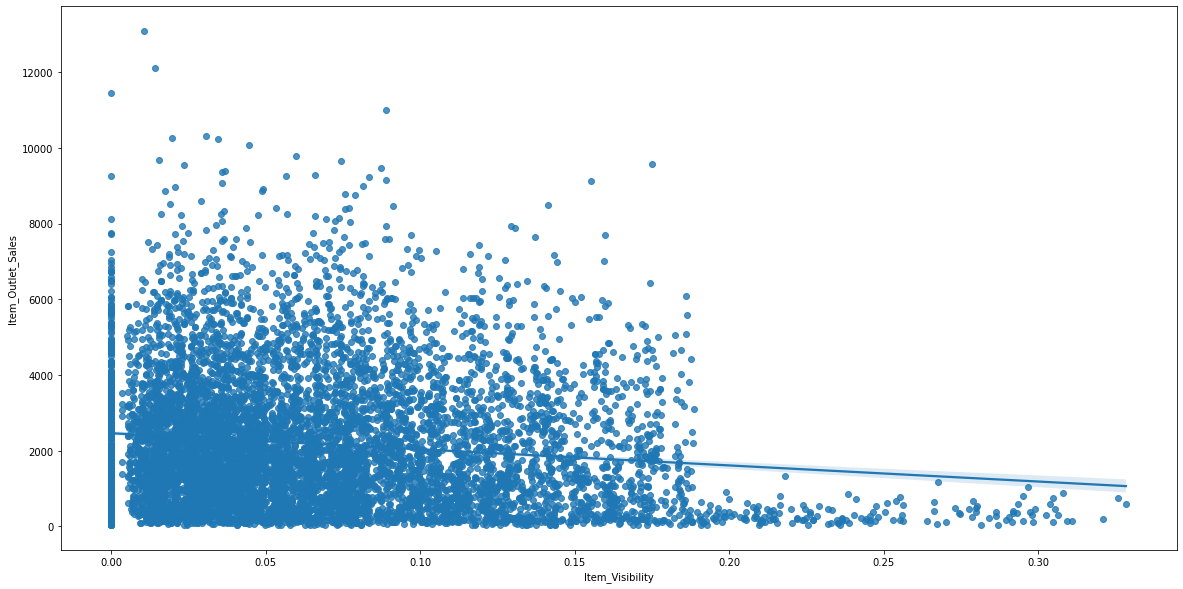

In [32]:
plt.figure(figsize = (20,10))

sns.regplot(x=data_train["Item_Visibility"], y=data_train["Item_Outlet_Sales"])

Item_Visibility has a minimum value of zero, which makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

Therefore, replacing the 0 visibility using mean method.

Text(0, 0.5, 'Item Visibility')

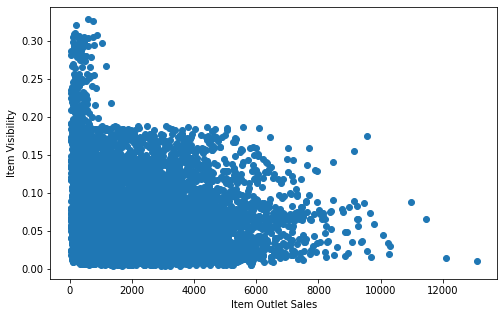

In [33]:
data_train['Item_Visibility']=data_train['Item_Visibility'].replace(0,data_train['Item_Visibility'].mean())
data_test['Item_Visibility']=data_test['Item_Visibility'].replace(0,data_test['Item_Visibility'].mean())
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=data_train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

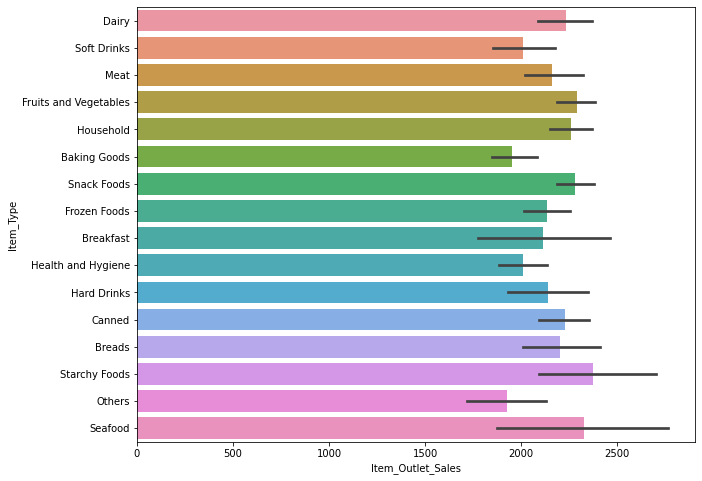

In [34]:
plt.figure(figsize = (10,8))
sns.barplot(x="Item_Outlet_Sales", y="Item_Type", data=data_train)

Observations: The products availablility is high for Fruits-Veggies and Snack Foods and low for seafood items but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

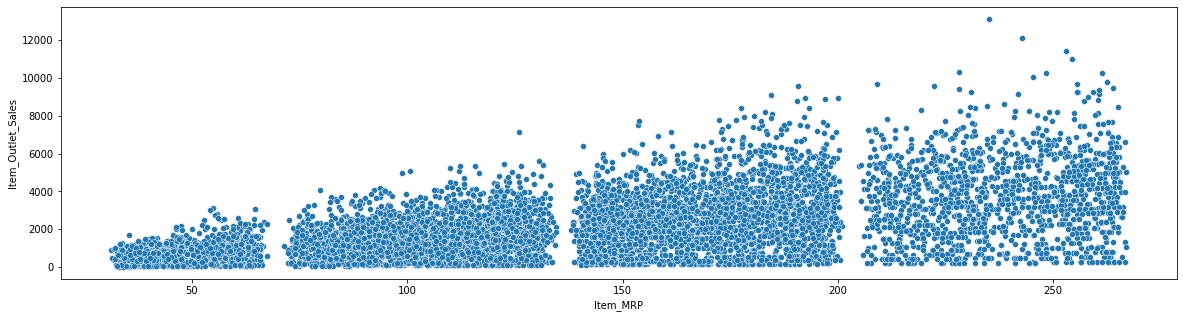

In [35]:
plt.figure(figsize =(20,5))
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = data_train)

Observations: Items MRP ranging from 200-250 dollars is having high Sales.

From the trend, it can also assume that, the items having more MRP are having more sales.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

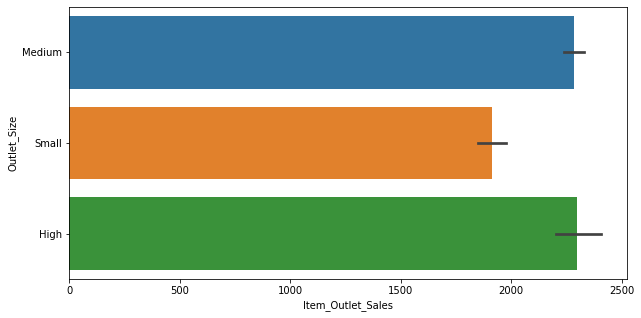

In [36]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Item_Outlet_Sales',y = 'Outlet_Size',data = data_train, order= data_train['Outlet_Size'].value_counts().index)

Observations: Even though there are more Medium Sized Outlets but still the sales of High Sized Outlets and Medium sized Outlets are high. which means we can improve the Outlet Sales by more High Sized Outlets.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

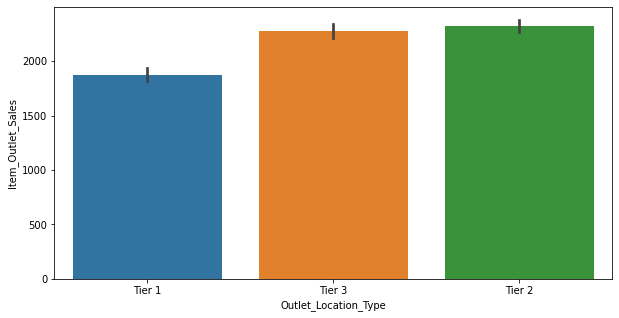

In [37]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',data = data_train )

Observations: Even though we have more outlets in tier 3 cities but the The Outlet Sales high for Tier3 and Tier 2 location types are high, therefore we can improve the sales by increasing outlets in tier 2 cities.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

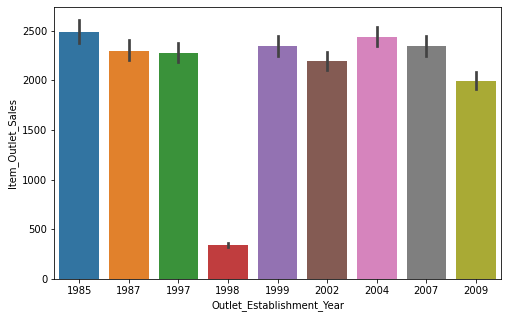

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data_train)

Observation:It is quiet evident that Outlets established in 1985 is having good Sales margin. We also have a outlet which was established in 1998 has the lowest sales margin, so establishment year wouldn't improve the Sales unless the products are sold according to customer's interest.

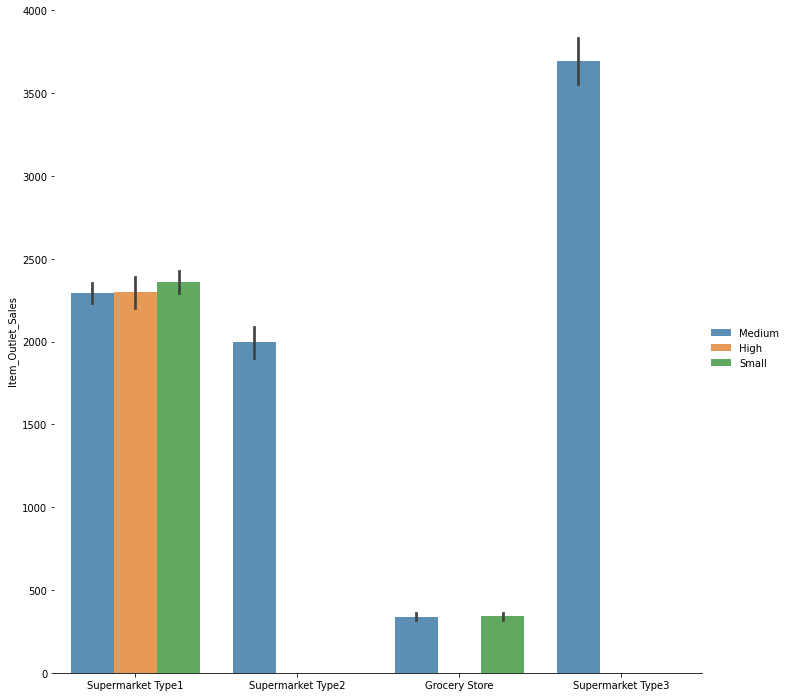

In [39]:
g = sns.catplot(data=data_train, kind="bar", x="Outlet_Type", y="Item_Outlet_Sales", hue="Outlet_Size",alpha=.8, height=10)
g.despine(left=True)
g.set_axis_labels("", "Item_Outlet_Sales")
g.legend.set_title("")

Observation : Supermarket Type3 with medium Outlet size Generates large outlet sales

In [40]:
# Encoding Dataset

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [41]:
elements = data_train.select_dtypes(include=['object']).columns

elements

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Converting All Categorical Data into Continuous data.

In [42]:
for i in elements:
    data_train[i] = enc.fit_transform(data_train[i])

for i in elements:
    data_test[i] = enc.fit_transform(data_test[i])

In [43]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 632.6 KB


In [44]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int32  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int32  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int32  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int32  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int32  
 9   Outlet_Location_Type       5681 non-null   int32  
 10  Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 377.3 KB


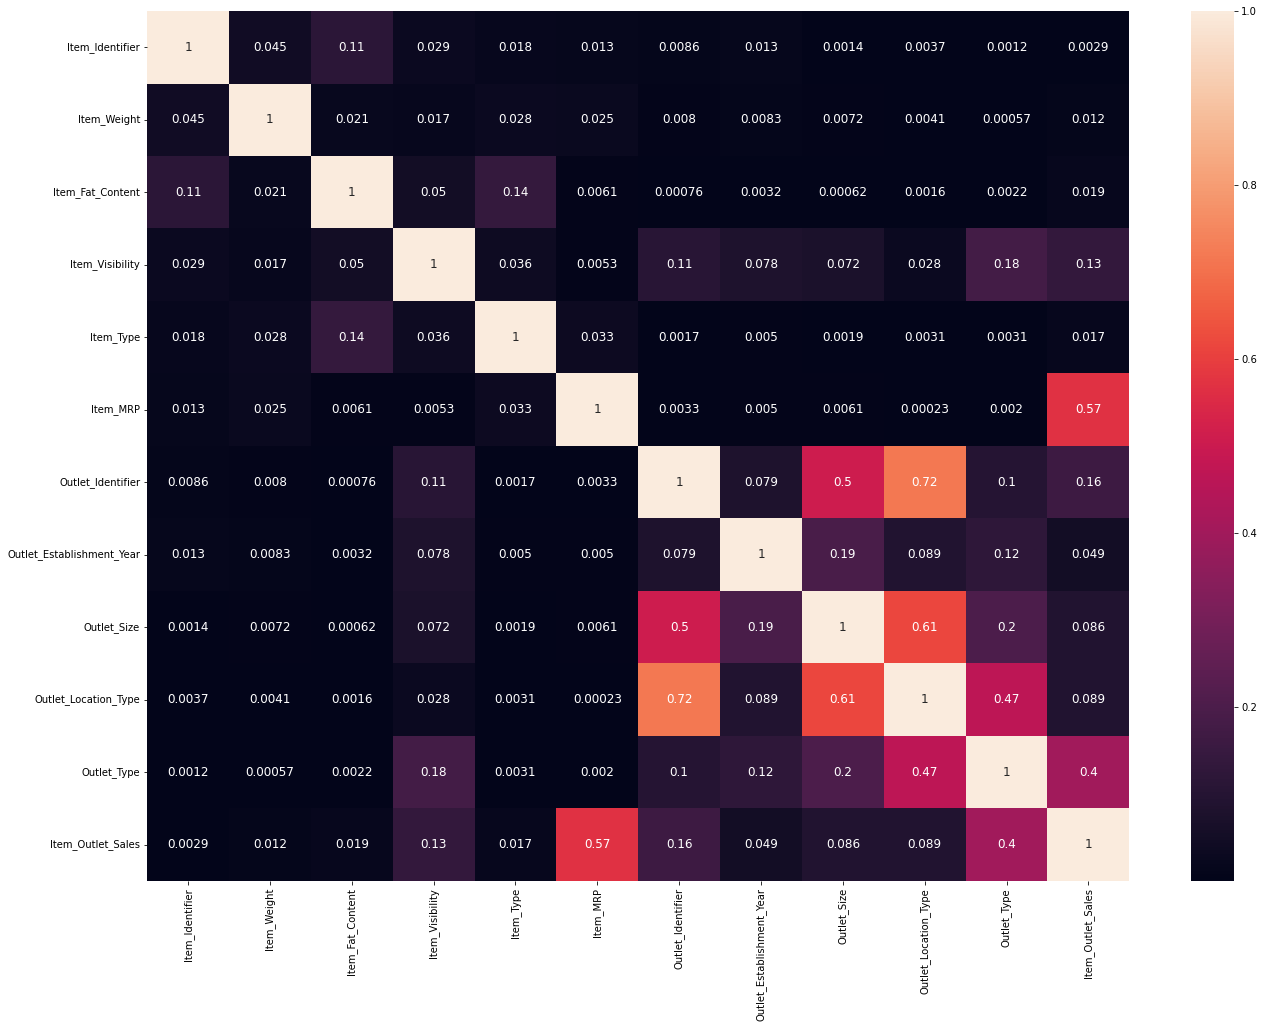

In [45]:
data_train_corr = data_train.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(data_train_corr, annot = True, annot_kws={'size':12})
plt.show()

There seems to be no strong correlation between the independent variables. let's check the same using VIF.

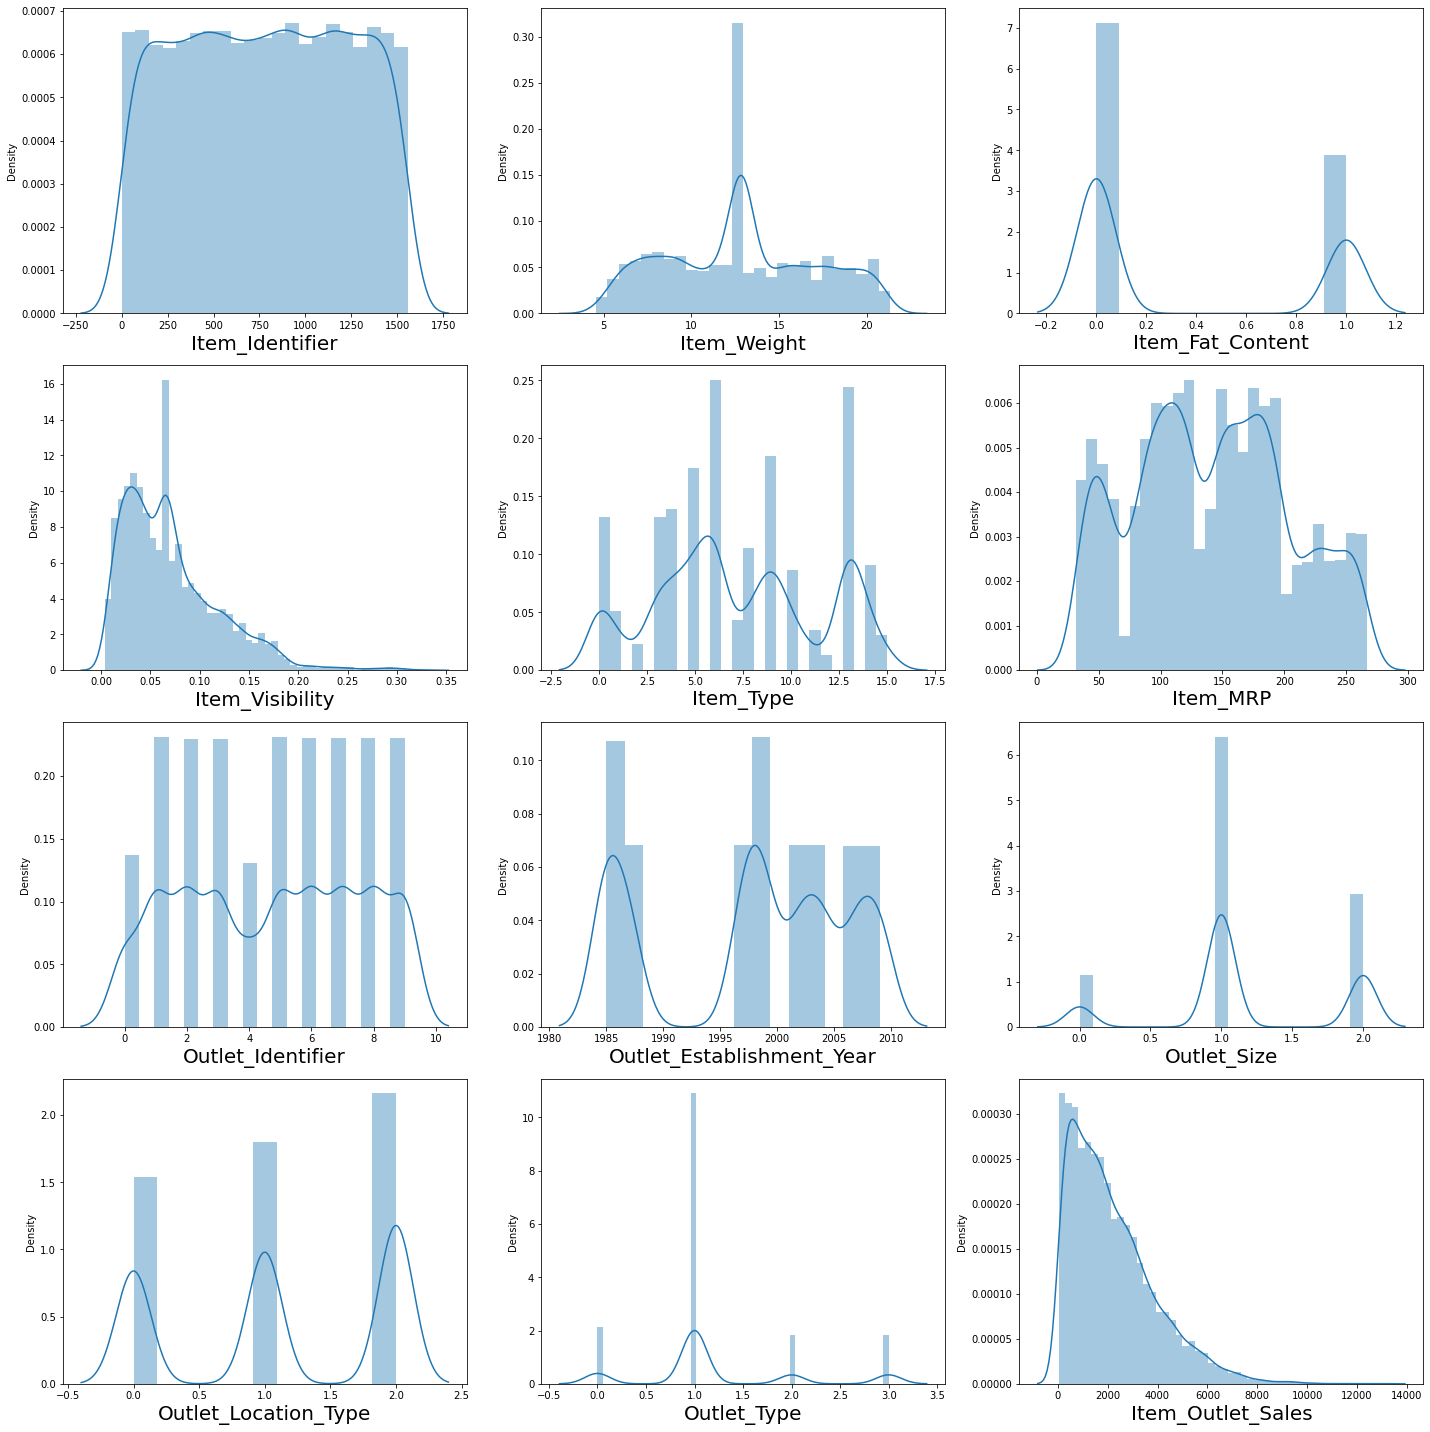

In [46]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in data_train:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

Observations: There are columns like, Item Visibility which does not follows a normal distribution curve. Therefore, let's check for skewness in the dataset.

In [47]:
x = data_train.drop(columns = 'Item_Outlet_Sales')
y = data_train.Item_Outlet_Sales

In [48]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.066132,6,182.0950,0,1998,1,2,0
4,1297,8.93,0,0.066132,9,53.8614,1,1987,0,2,1


In [49]:
print(x.shape)
print(y.shape)

(8523, 11)
(8523,)


In [50]:
# Checking SKewness

x.skew().sort_values(ascending = False)

Item_Visibility              1.286877
Outlet_Type                  0.927438
Item_Fat_Content             0.616705
Item_MRP                     0.127202
Item_Type                    0.101655
Item_Weight                  0.090561
Item_Identifier             -0.008877
Outlet_Identifier           -0.059861
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Establishment_Year   -0.396641
dtype: float64

We can see the skewness in some columns of our dataset. we will remove the skewness using power_transform function.

In [51]:
from sklearn.preprocessing import power_transform

x_new = power_transform(x)

In [52]:
pd.DataFrame(x_new).skew().sort_values(ascending = False)

2     0.616705
3     0.132593
10    0.007863
8    -0.042980
1    -0.068024
5    -0.115386
4    -0.164574
7    -0.200959
6    -0.213935
9    -0.220632
0    -0.293700
dtype: float64

In [53]:
x = pd.DataFrame(x_new, columns = x.columns)

In [54]:
x.skew().sort_values(ascending = False)

Item_Fat_Content             0.616705
Item_Visibility              0.132593
Outlet_Type                  0.007863
Outlet_Size                 -0.042980
Item_Weight                 -0.068024
Item_MRP                    -0.115386
Item_Type                   -0.164574
Outlet_Establishment_Year   -0.200959
Outlet_Identifier           -0.213935
Outlet_Location_Type        -0.220632
Item_Identifier             -0.293700
dtype: float64

In [55]:
x.skew()[np.abs(x.skew())<0.25].all()

True

The Skewness is removed from the train dataset, we will follow the same steps to remove skewness from test dataset as well.

In [56]:
data_test.shape

(5681, 11)

In [57]:
data_test.skew().sort_values(ascending = False)

Item_Visibility              1.372659
Outlet_Type                  0.927446
Item_Fat_Content             0.609223
Item_Weight                  0.142813
Item_MRP                     0.136182
Item_Type                    0.096486
Item_Identifier             -0.000020
Outlet_Identifier           -0.060209
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Establishment_Year   -0.396306
dtype: float64

In [58]:
from sklearn.preprocessing import power_transform

data_test_new = power_transform(data_test)

In [59]:
pd.DataFrame(data_test_new).skew().sort_values(ascending = False)

2     0.609223
3     0.125714
10    0.007830
8    -0.042981
1    -0.060915
5    -0.111040
4    -0.167431
7    -0.200515
6    -0.214064
9    -0.220642
0    -0.285982
dtype: float64

In [60]:
data_test = pd.DataFrame(data_test_new, columns = data_test.columns)

In [61]:
data_test.skew().sort_values(ascending = False)

Item_Fat_Content             0.609223
Item_Visibility              0.125714
Outlet_Type                  0.007830
Outlet_Size                 -0.042981
Item_Weight                 -0.060915
Item_MRP                    -0.111040
Item_Type                   -0.167431
Outlet_Establishment_Year   -0.200515
Outlet_Identifier           -0.214064
Outlet_Location_Type        -0.220642
Item_Identifier             -0.285982
dtype: float64

In [62]:
data_test.skew()[np.abs(x.skew())<0.25].all()

True

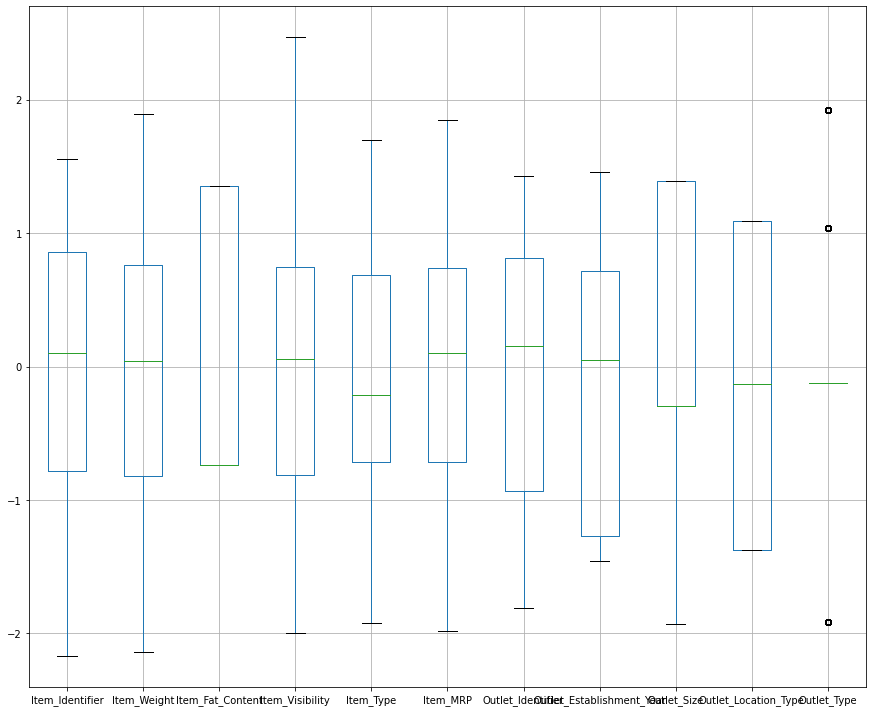

In [63]:
# checking Outliers

x.iloc[:,:].boxplot(figsize = (15,15))
plt.subplots_adjust(bottom = 0.25)
plt.show()

In [64]:
from scipy.stats import zscore

print((np.abs(zscore(x))<3).all())

Item_Identifier              True
Item_Weight                  True
Item_Fat_Content             True
Item_Visibility              True
Item_Type                    True
Item_MRP                     True
Outlet_Identifier            True
Outlet_Establishment_Year    True
Outlet_Size                  True
Outlet_Location_Type         True
Outlet_Type                  True
dtype: bool


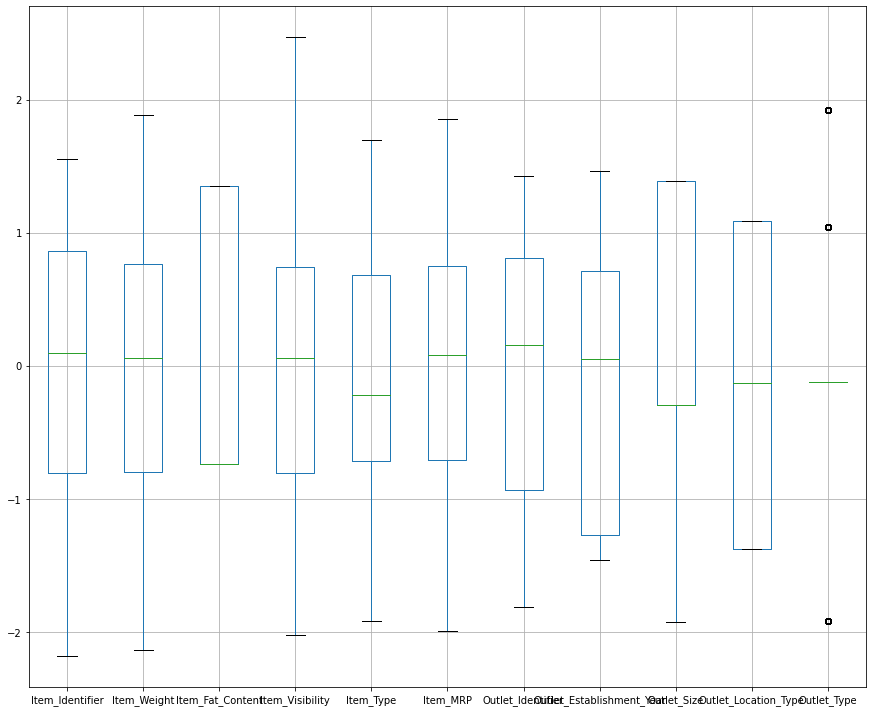

In [65]:
# checking Outliers

data_test.iloc[:,:].boxplot(figsize = (15,15))
plt.subplots_adjust(bottom = 0.25)
plt.show()

In [66]:
print((np.abs(zscore(data_test))<3).all())

Item_Identifier              True
Item_Weight                  True
Item_Fat_Content             True
Item_Visibility              True
Item_Type                    True
Item_MRP                     True
Outlet_Identifier            True
Outlet_Establishment_Year    True
Outlet_Size                  True
Outlet_Location_Type         True
Outlet_Type                  True
dtype: bool


Observation: There is no outlier present in either Train or Test Dataset.

Using Variance Inflation Factor (VIF) to identify the multicollinearity in the problem.

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.011906,Item_Identifier
1,1.004809,Item_Weight
2,1.032340,Item_Fat_Content
3,1.052164,Item_Visibility
4,1.028235,Item_Type
5,1.002603,Item_MRP
6,4.756951,Outlet_Identifier
7,1.047837,Outlet_Establishment_Year
8,1.735553,Outlet_Size
9,5.471260,Outlet_Location_Type


In [69]:
data_test_scaled = scaler.fit_transform(data_test)

In [70]:
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(data_test_scaled, i) for i in range (data_test_scaled.shape[1])]

vif['features'] = data_test.columns


# Lets check the values 
vif

,vif,features
0,1.011212,Item_Identifier
1,1.007431,Item_Weight
2,1.037174,Item_Fat_Content
3,1.056952,Item_Visibility
4,1.037223,Item_Type
5,1.005957,Item_MRP
6,4.754690,Outlet_Identifier
7,1.052168,Outlet_Establishment_Year
8,1.735198,Outlet_Size
9,5.480013,Outlet_Location_Type


Observation: The highest VIF value is for Outlet_Location_Type, and from correlation heatmap it is evident that this vif is due to Outlet_Identifier. Therefore, we will remove the Outlet_Identifier from our dataset as it does not contribute much for target variable prediction.

Item_Identifier, Outlet_Identifier and Outlet_Establishment_Year are supposed to be dropped as they don't seem to be helping in our analysis.

In [71]:
x.drop(columns = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1, inplace = True)
data_test.drop(columns = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1, inplace = True)

In [72]:
print(x.shape)
print(data_test.shape)

(8523, 8)
(5681, 8)


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [74]:
max_r2_score = 0
maxRS = 0

for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    r2score = r2_score(y_test,y_pred)
    print('r2_score', r2score*100,'%', 'random_state', i)
    
    if r2score > max_r2_score:
        max_r2_score = r2score
        maxRS = i
        print('r2_score', max_r2_score*100,'%', 'random_state', i)

r2_score 52.2214552797966 % random_state 1
r2_score 52.2214552797966 % random_state 1
r2_score 52.79115399078206 % random_state 2
r2_score 52.79115399078206 % random_state 2
r2_score 54.69804180954074 % random_state 3
r2_score 54.69804180954074 % random_state 3
r2_score 51.551957957057205 % random_state 4
r2_score 52.515072842220675 % random_state 5
r2_score 52.14688670730793 % random_state 6
r2_score 50.370940517566524 % random_state 7
r2_score 52.565138270212344 % random_state 8
r2_score 51.82171507122175 % random_state 9
r2_score 51.66211344043141 % random_state 10
r2_score 50.40894670126834 % random_state 11
r2_score 52.6246348180142 % random_state 12
r2_score 52.08800908215389 % random_state 13
r2_score 52.322256131522906 % random_state 14
r2_score 53.15930257496537 % random_state 15
r2_score 52.068855876374656 % random_state 16
r2_score 52.90951712420012 % random_state 17
r2_score 50.9894089184992 % random_state 18
r2_score 51.98011534101094 % random_state 19
r2_score 53.02063244

r2_score 53.28785398348247 % random_state 185
r2_score 53.71206671938307 % random_state 186
r2_score 52.75757407804371 % random_state 187
r2_score 51.961086034190075 % random_state 188
r2_score 51.89729007948445 % random_state 189
r2_score 51.00580933477244 % random_state 190
r2_score 52.08285988711915 % random_state 191
r2_score 50.74870707602863 % random_state 192
r2_score 53.932119593437754 % random_state 193
r2_score 54.339713000820545 % random_state 194
r2_score 52.69074933201785 % random_state 195
r2_score 52.645253249484014 % random_state 196
r2_score 53.771195267924 % random_state 197
r2_score 51.831559075628256 % random_state 198
r2_score 53.85867256487427 % random_state 199
r2_score 53.49303258499813 % random_state 200
r2_score 51.997713229762695 % random_state 201
r2_score 50.19360865092442 % random_state 202
r2_score 52.41350110754573 % random_state 203
r2_score 51.397808204815334 % random_state 204
r2_score 51.288623678483916 % random_state 205
r2_score 50.14608661423493 %

r2_score 53.3271401131624 % random_state 377
r2_score 51.621621042701115 % random_state 378
r2_score 52.244945691047384 % random_state 379
r2_score 51.555178747274276 % random_state 380
r2_score 50.227424511846266 % random_state 381
r2_score 50.99374461236324 % random_state 382
r2_score 53.98556777490449 % random_state 383
r2_score 51.70955121224983 % random_state 384
r2_score 52.100126785550025 % random_state 385
r2_score 54.16294665859272 % random_state 386
r2_score 51.810029607327046 % random_state 387
r2_score 53.9253997107376 % random_state 388
r2_score 53.838662448444175 % random_state 389
r2_score 52.60129823689985 % random_state 390
r2_score 53.1950235521571 % random_state 391
r2_score 51.33170869828307 % random_state 392
r2_score 53.48978082711244 % random_state 393
r2_score 51.776113105157684 % random_state 394
r2_score 51.252580198373806 % random_state 395
r2_score 53.011806491367985 % random_state 396
r2_score 51.85972816879825 % random_state 397
r2_score 51.449844038495925

r2_score 53.199707760330604 % random_state 558
r2_score 52.23934270965508 % random_state 559
r2_score 51.24323865139755 % random_state 560
r2_score 52.55238106544691 % random_state 561
r2_score 50.02115613959934 % random_state 562
r2_score 53.346383852869714 % random_state 563
r2_score 52.43698565274085 % random_state 564
r2_score 52.315501267910356 % random_state 565
r2_score 48.795370406992724 % random_state 566
r2_score 51.42688084746045 % random_state 567
r2_score 50.409572653845856 % random_state 568
r2_score 53.02553455095919 % random_state 569
r2_score 52.110668077003396 % random_state 570
r2_score 51.47825947173471 % random_state 571
r2_score 52.43168019281549 % random_state 572
r2_score 49.97079801912817 % random_state 573
r2_score 51.96012043385079 % random_state 574
r2_score 51.32712584312071 % random_state 575
r2_score 51.676972778336626 % random_state 576
r2_score 52.87722763744115 % random_state 577
r2_score 53.537017334454994 % random_state 578
r2_score 51.81347293653282

r2_score 51.44288058602958 % random_state 738
r2_score 52.55457392182886 % random_state 739
r2_score 52.609740523166714 % random_state 740
r2_score 53.60634640320552 % random_state 741
r2_score 52.39025092530276 % random_state 742
r2_score 53.464255304766795 % random_state 743
r2_score 53.50781075468192 % random_state 744
r2_score 51.38482877327557 % random_state 745
r2_score 52.47004136905843 % random_state 746
r2_score 51.55995197427714 % random_state 747
r2_score 52.56047643002433 % random_state 748
r2_score 51.86145389993033 % random_state 749
r2_score 53.2121735710347 % random_state 750
r2_score 49.84761341893863 % random_state 751
r2_score 51.17748258870062 % random_state 752
r2_score 52.675817883182894 % random_state 753
r2_score 52.720041132678055 % random_state 754
r2_score 53.36409871118859 % random_state 755
r2_score 52.285386185236085 % random_state 756
r2_score 53.28247056587041 % random_state 757
r2_score 51.26226636929667 % random_state 758
r2_score 52.169979122716384 % 

r2_score 48.995615602002054 % random_state 922
r2_score 51.08101149435013 % random_state 923
r2_score 52.24870740757262 % random_state 924
r2_score 51.40336516604018 % random_state 925
r2_score 52.503099025378376 % random_state 926
r2_score 52.65642996058089 % random_state 927
r2_score 52.02508660949432 % random_state 928
r2_score 51.91719773321819 % random_state 929
r2_score 51.71606094204992 % random_state 930
r2_score 49.168688365813516 % random_state 931
r2_score 52.53296293929062 % random_state 932
r2_score 53.12667758327502 % random_state 933
r2_score 51.98197970332708 % random_state 934
r2_score 50.4120627287763 % random_state 935
r2_score 51.87659761070794 % random_state 936
r2_score 52.596286277339935 % random_state 937
r2_score 52.08450438625779 % random_state 938
r2_score 53.03071645890864 % random_state 939
r2_score 52.386910746032854 % random_state 940
r2_score 52.69694327801897 % random_state 941
r2_score 53.07191841122724 % random_state 942
r2_score 52.80505807340501 % r

In [75]:
print('Best R2 Score is', max_r2_score, 'on Random_state', maxRS)

Best R2 Score is 0.557213818642936 on Random_state 451


In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 451)

In [77]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 11)
(2131, 11)
(6392,)
(2131,)


In [78]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [79]:
r2_score(y_test, y_pred)

0.557213818642936

In [80]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

print("Square Root of Mean Square Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))

print("The Model Testing Accuracy is: ", r2_score(y_test, y_pred))

Mean Absolute Error:  879.7597101021333
Mean Squared Error:  1345990.1185686057
Square Root of Mean Square Error:  1160.1681423692885
The Model Testing Accuracy is:  0.557213818642936


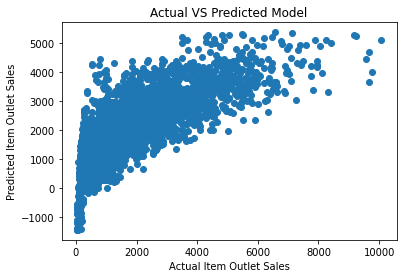

In [81]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Item Outlet Sales')
plt.ylabel('Predicted Item Outlet Sales')
plt.title('Actual VS Predicted Model')
plt.show()

##### Observations: 
1. The Model Accuracy (r2_score) using Linear regression model is = 55.72%
2. Mean Absolute Error (MAE) :  879.7597101021333
3. Mean Squared Error (MSE) :  1345990.1185686057
4. Square Root of Mean Square Error (RMSE):  1160.1681423692885

### Cross - Validation

In [82]:
from sklearn.model_selection import cross_val_score

r2score = r2_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(reg, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score*100)

At CV: 2
Cross Validation Score is:  51.87644146042618
R2_Score is :  55.7213818642936
At CV: 3
Cross Validation Score is:  51.88652524982703
R2_Score is :  55.7213818642936
At CV: 4
Cross Validation Score is:  51.725622528228286
R2_Score is :  55.7213818642936
At CV: 5
Cross Validation Score is:  51.823933444610816
R2_Score is :  55.7213818642936
At CV: 6
Cross Validation Score is:  51.80843693423734
R2_Score is :  55.7213818642936
At CV: 7
Cross Validation Score is:  51.851926453870064
R2_Score is :  55.7213818642936
At CV: 8
Cross Validation Score is:  51.80141002055966
R2_Score is :  55.7213818642936
At CV: 9
Cross Validation Score is:  51.82460761709882
R2_Score is :  55.7213818642936
At CV: 10
Cross Validation Score is:  51.76871427170443
R2_Score is :  55.7213818642936


In [83]:
cvscore_selected = cross_val_score(reg, x, y, cv = 3).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.5188652524982703 
The R2_Score is:  0.557213818642936


In [84]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


print('R2 Score: ', r2_score(y_test, y_pred))
print('*************************************')
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('***************************************')
r2score = r2_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(rf, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score*100)

R2 Score:  0.5962581251144273
*************************************
Mean Squared Error:  1227302.4699705285
***************************************
At CV: 2
Cross Validation Score is:  53.52770054796915
R2_Score is :  59.62581251144273
At CV: 3
Cross Validation Score is:  54.188624246582926
R2_Score is :  59.62581251144273
At CV: 4
Cross Validation Score is:  53.66639616123552
R2_Score is :  59.62581251144273
At CV: 5
Cross Validation Score is:  54.14396321634456
R2_Score is :  59.62581251144273
At CV: 6
Cross Validation Score is:  54.39348297860273
R2_Score is :  59.62581251144273
At CV: 7
Cross Validation Score is:  54.02523567124201
R2_Score is :  59.62581251144273
At CV: 8
Cross Validation Score is:  54.208055248655306
R2_Score is :  59.62581251144273
At CV: 9
Cross Validation Score is:  54.10953904696534
R2_Score is :  59.62581251144273
At CV: 10
Cross Validation Score is:  54.18958907378336
R2_Score is :  59.62581251144273


In [85]:
cvscore_selected = cross_val_score(rf, x, y, cv = 6).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.5450063100222964 
The R2_Score is:  0.5962581251144273


In [86]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print('R2 Score: ', r2_score(y_test, y_pred))
print('***************************************')
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('***************************************')
r2score = r2_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(xgb, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score*100)

R2 Score:  0.5625566745984147
***************************************
Mean Squared Error:  1329748.8002443314
***************************************
At CV: 2
Cross Validation Score is:  50.57253219344042
R2_Score is :  56.255667459841476
At CV: 3
Cross Validation Score is:  51.22299709903794
R2_Score is :  56.255667459841476
At CV: 4
Cross Validation Score is:  52.242479550000496
R2_Score is :  56.255667459841476
At CV: 5
Cross Validation Score is:  52.340732990526284
R2_Score is :  56.255667459841476
At CV: 6
Cross Validation Score is:  52.55534685744511
R2_Score is :  56.255667459841476
At CV: 7
Cross Validation Score is:  52.5070176503763
R2_Score is :  56.255667459841476
At CV: 8
Cross Validation Score is:  53.40493040869359
R2_Score is :  56.255667459841476
At CV: 9
Cross Validation Score is:  52.50714270190381
R2_Score is :  56.255667459841476
At CV: 10
Cross Validation Score is:  53.13192953770005
R2_Score is :  56.255667459841476


In [87]:
cvscore_selected = cross_val_score(xgb, x, y, cv = 6).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.5255534685744511 
The R2_Score is:  0.5625566745984147


In [88]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


print('R2 Score: ', r2_score(y_test, y_pred))
print('***************************************')
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('***************************************')
r2score = r2_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(knn, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score*100)

R2 Score:  0.5506293425625477
***************************************
Mean Squared Error:  1366005.738100795
***************************************
At CV: 2
Cross Validation Score is:  49.775242028582156
R2_Score is :  55.06293425625477
At CV: 3
Cross Validation Score is:  50.46154676261821
R2_Score is :  55.06293425625477
At CV: 4
Cross Validation Score is:  50.49628110053986
R2_Score is :  55.06293425625477
At CV: 5
Cross Validation Score is:  50.29359172110589
R2_Score is :  55.06293425625477
At CV: 6
Cross Validation Score is:  51.05981464737339
R2_Score is :  55.06293425625477
At CV: 7
Cross Validation Score is:  50.580735282677615
R2_Score is :  55.06293425625477
At CV: 8
Cross Validation Score is:  50.80472415161073
R2_Score is :  55.06293425625477
At CV: 9
Cross Validation Score is:  50.47880275242236
R2_Score is :  55.06293425625477
At CV: 10
Cross Validation Score is:  50.892276159747894
R2_Score is :  55.06293425625477


In [89]:
cvscore_selected = cross_val_score(knn, x, y, cv = 6).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.5105981464737339 
The R2_Score is:  0.5506293425625477


In [90]:
from sklearn.linear_model import Lasso, LassoCV

lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)

lasscv.fit(x_train, y_train)

alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

lasso_reg.score(x_test,y_test)

0.5572130524715486

##### Observations:

1. Linear Regression Model:
        - R2 Score: 55.72
        - CV Score: 51.88
2. Random Forest Regression Model:
        - R2 Score: 59.62
        - CV Score: 54.39
3. XGB Regression Model:
        - R2 Score: 56.25
        - CV Score: 52.55
4. KNeighbors Regression Model:
        - R2 Score: 55.06
        - CV Score: 51.05
5. Lasso Model:
        - R2 Score: 55.72
        
        

Random Forest Regression Model has the best R2 Score and CV Score.

Therefore, selecting Random Forest Regression Model for HyperParameter Tuning.

# Hyper Parameter Tuning

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : np.arange(10,100,10), 
              'max_depth': np.arange(1,21,5), 
              'min_samples_leaf' : np.arange(0.1, 1.0, 0.2), 
              'min_samples_split' : np.arange(0.1, 1.0, 0.2)}

grd = GridSearchCV(rf, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

rf = grd.best_estimator_

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


print('R2 Score: ', rf.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best Param ==> {'max_depth': 16, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 30}
R2 Score:  0.37815849220623465
Mean Squared Error:  1890286.0117291184


In [93]:
# Saving the Model

import joblib
joblib.dump(rf, "Big_Mart_Data.pkl")

['Big_Mart_Data.pkl']